## Contribution to W. Olson review paper

### Manuscript Draft 2: Histogram

Objectives: 1-D Histograms of slide, roll, and twist cof xCAy and xACy


In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText

path = os.getcwd()

In [4]:
tet_dataset  = pd.read_csv("datafiles/czapla2022_3sig_tet", index_col=0)

tet_dataset_ac = tet_dataset[tet_dataset.step_dimer=="AC"].reset_index(drop=True)
tet_dataset_ca = tet_dataset[tet_dataset.step_dimer=="CA"].reset_index(drop=True)

del tet_dataset

In [19]:
tet_dataset_ori_ca.head()

,tilt,roll,twist,shift,slide,rise,pdb_id,step_dimer,step_tetramer,dimer_neighbors,coding,DIMER,TETRAMER
0,3.8968,3.5625,34.8023,1.2387,0.5080,3.1555,1MNN,CA,ACAA,A__A,y,CA,ACAA
1,-1.9116,4.2104,31.0756,0.3187,-0.8429,3.4029,3G9M,CA,ACAA,A__A,y,CA,ACAA
2,-1.6840,5.6575,30.5065,0.5035,-0.9317,3.4752,3G9P,CA,ACAA,A__A,y,CA,ACAA
3,3.6386,-2.2727,40.1053,0.6039,0.8158,3.4250,6YCQ,CA,ACAA,A__A,y,CA,ACAA
4,-1.6840,5.6575,30.5065,0.5035,-0.9317,3.4752,3G9P,CA,ACAA,A__A,y,CA,ACAA


In [5]:
print(len(tet_dataset_ori_ca))
print(len(tet_dataset_ac))

5403
5182


<Figure size 640x480 with 0 Axes>

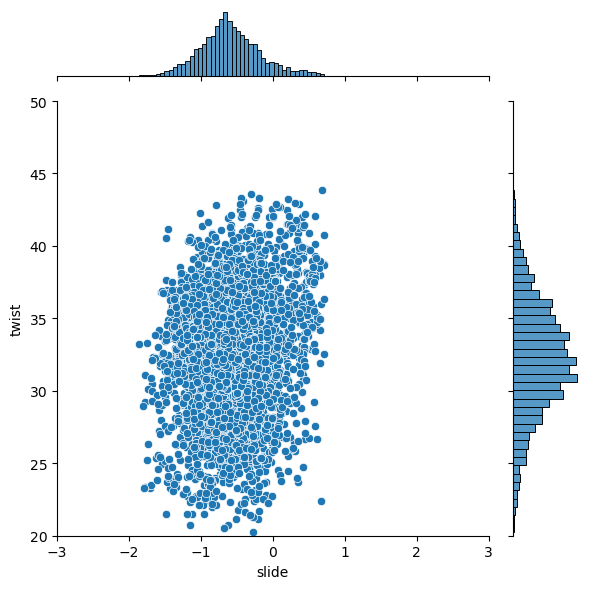

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

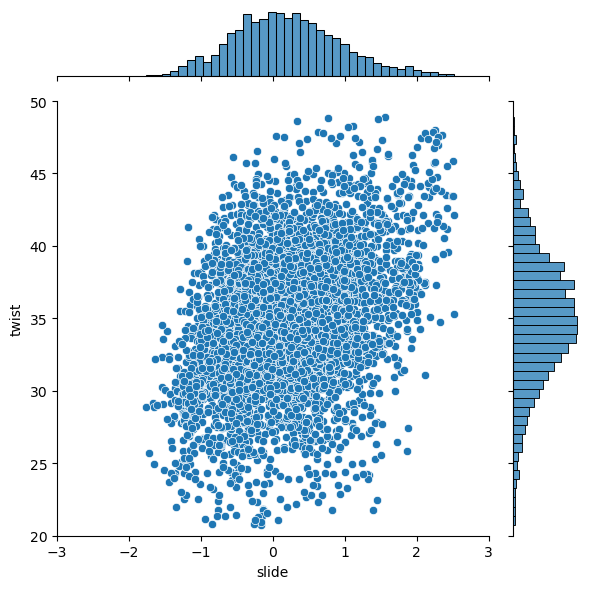

<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure()

sns.jointplot(data=tet_dataset_ac, 
               x='slide',
               y='twist')
plt.xlim(-3, 3)
plt.ylim(20, 50)
plt.tight_layout()
plt.show()
plt.clf()

fig = plt.figure()

sns.jointplot(data=tet_dataset_ori_ca, 
               x='slide',
               y='twist')
plt.xlim(-3, 3)
plt.ylim(20, 50)
plt.tight_layout()
plt.show()
plt.clf()

In [23]:
tet_grid_ac = [x+'AC'+y for x in ['A','G','C','T'] for y in ['A','G','C','T']]
tet_grid_ca = [x+'CA'+y for x in ['A','G','C','T'] for y in ['A','G','C','T']]


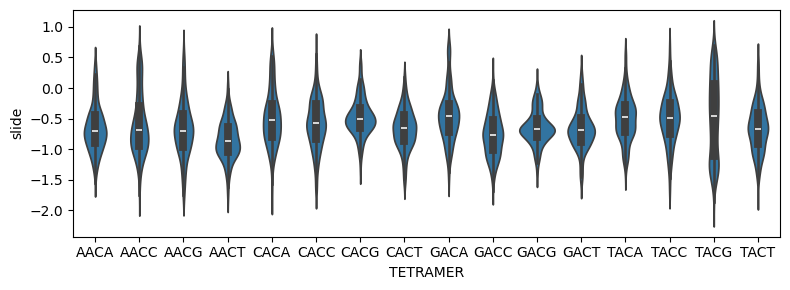

<Figure size 640x480 with 0 Axes>

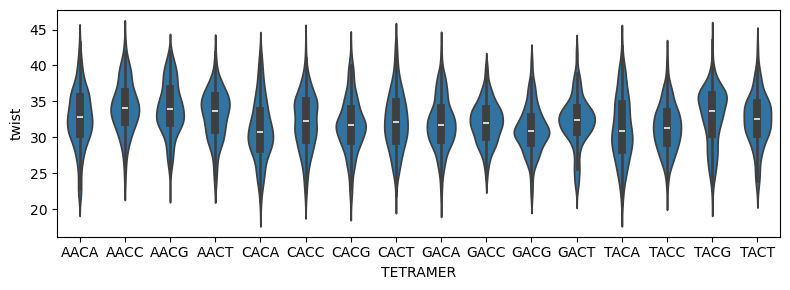

<Figure size 640x480 with 0 Axes>

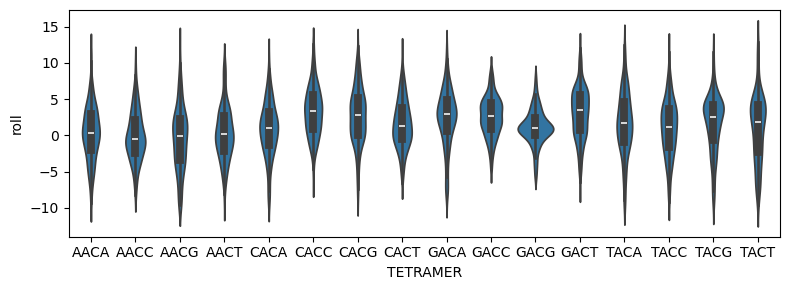

<Figure size 640x480 with 0 Axes>

In [7]:
for par in ['slide','twist','roll']:
    plt.figure(figsize=(8,3))
    sns.violinplot(data=tet_dataset_ac, y=par, x='TETRAMER')
    plt.tight_layout()
    plt.show()
    plt.clf()

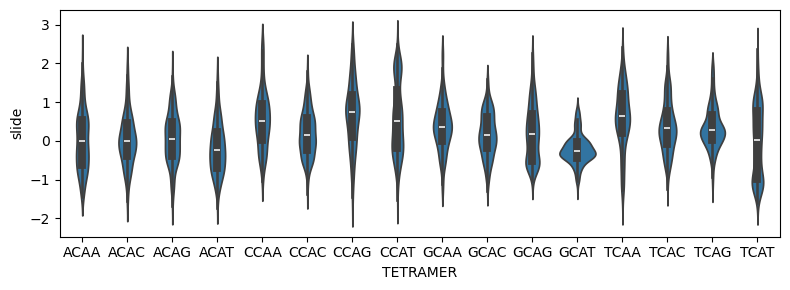

<Figure size 640x480 with 0 Axes>

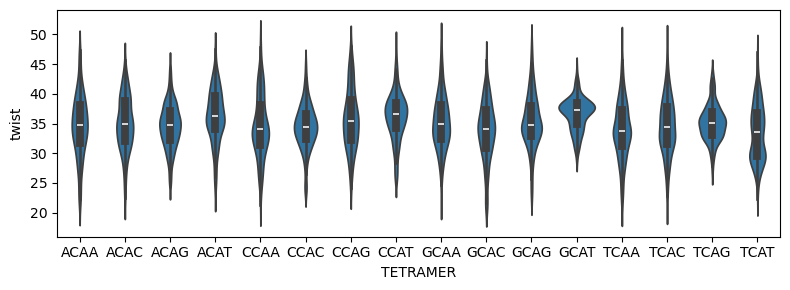

<Figure size 640x480 with 0 Axes>

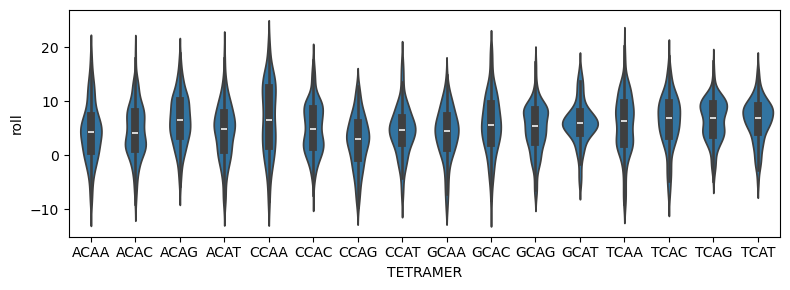

<Figure size 640x480 with 0 Axes>

In [8]:
for par in ['slide','twist','roll']:
    plt.figure(figsize=(8,3))
    sns.violinplot(data=tet_dataset_ori_ca, y=par, kde=True, x='TETRAMER')
    plt.tight_layout()
    plt.show()
    plt.clf()

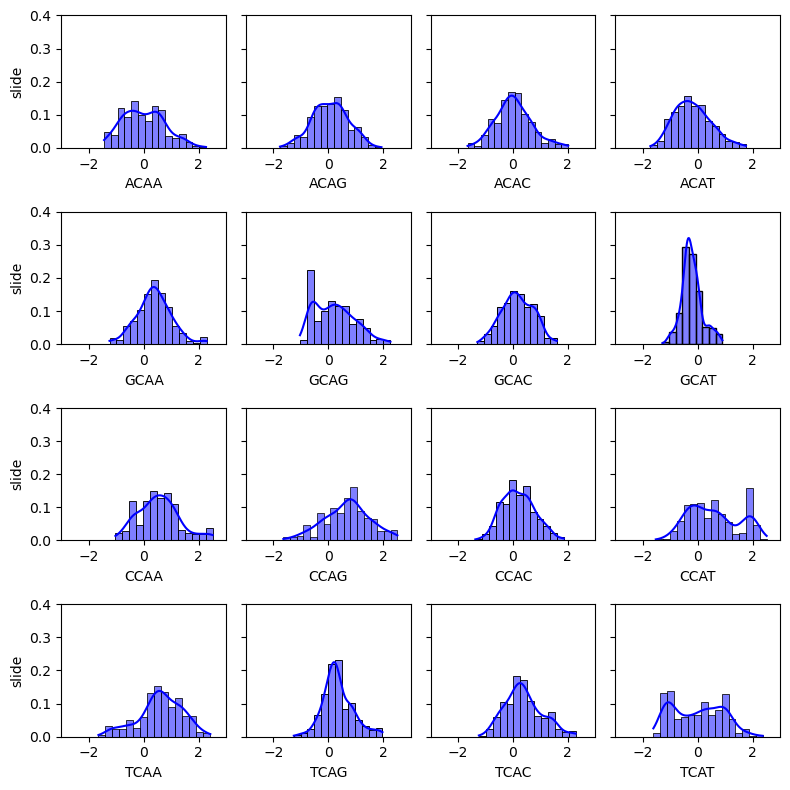

<Figure size 640x480 with 0 Axes>

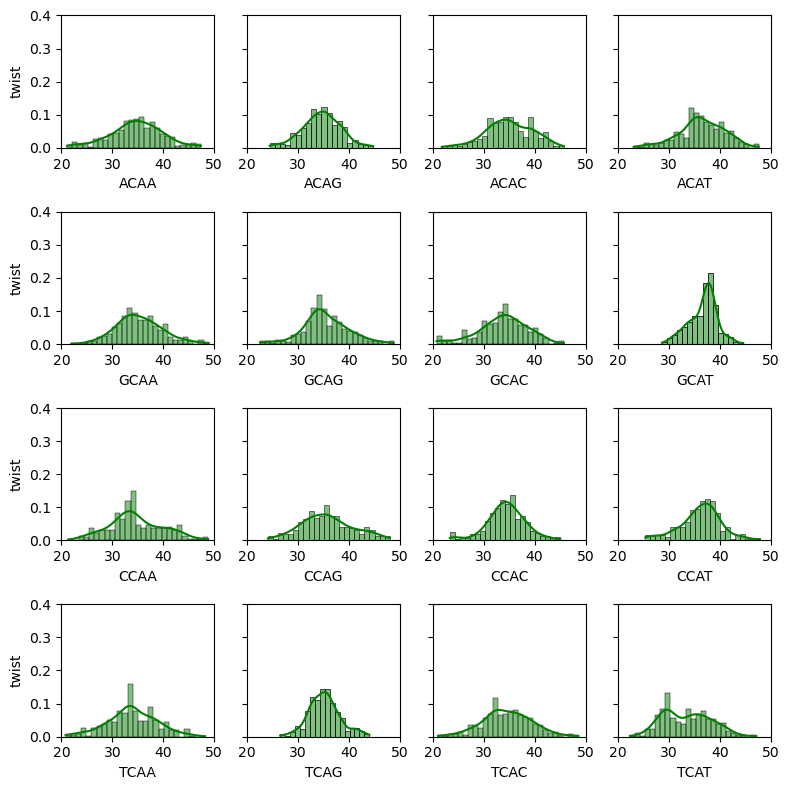

<Figure size 640x480 with 0 Axes>

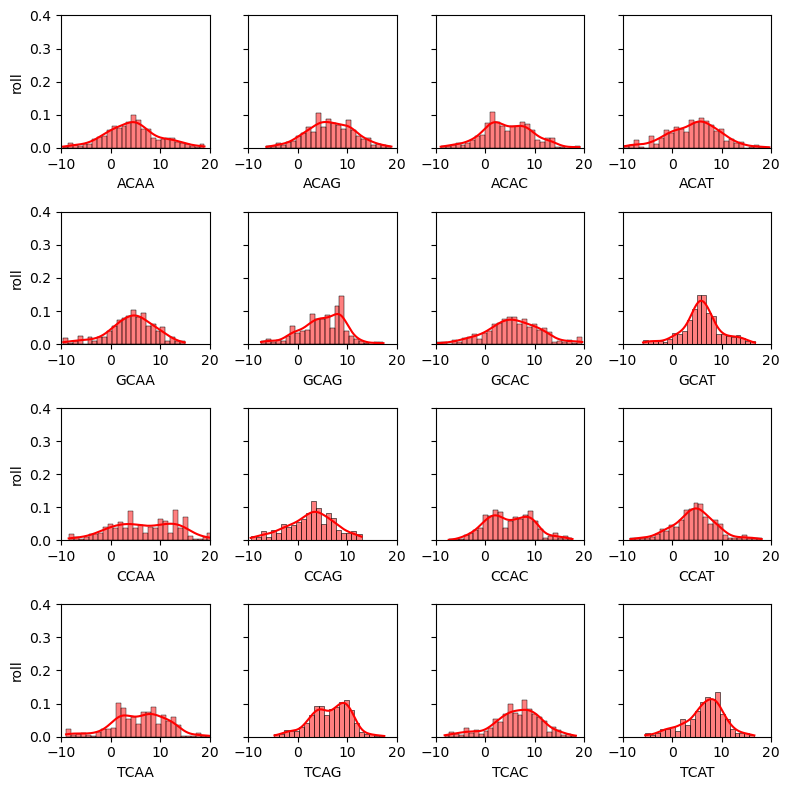

<Figure size 640x480 with 0 Axes>

In [49]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'red'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharey=True)

    sns.histplot(ax=axes[0,0], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[0]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,1], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[1]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,2], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[2]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,3], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_dataset_ori_ac[3]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    sns.histplot(ax=axes[1,0], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[4]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,1], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[5]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,2], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[6]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,3], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[7]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[1,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+4], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]),ylim=(0, 0.40))

    sns.histplot(ax=axes[2,0], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[8]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,1], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[9]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,2], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[10]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,3], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[11]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[2,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+8], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    sns.histplot(ax=axes[3,0], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[12]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,1], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[13]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,2], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[14]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,3], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[15]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[3,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+12], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    plt.ylabel('')

    plt.tight_layout()
    plt.show()
    plt.clf()

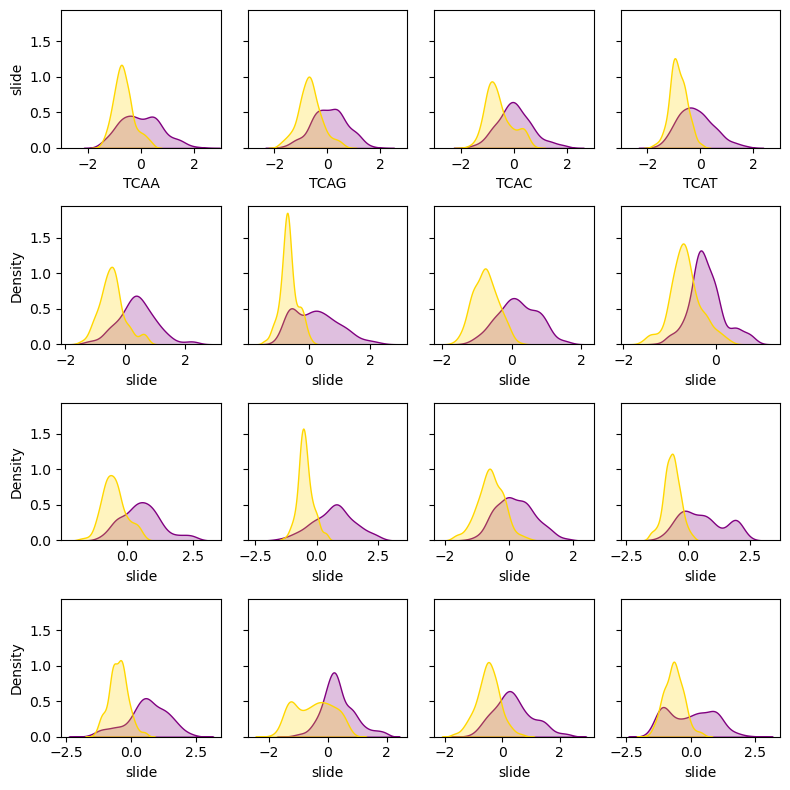

<Figure size 640x480 with 0 Axes>

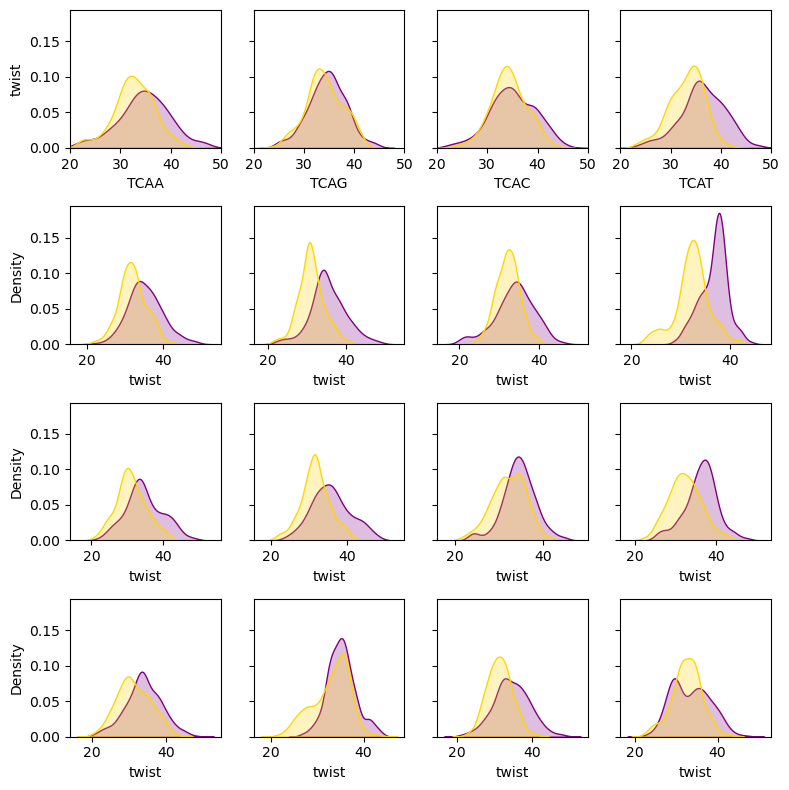

<Figure size 640x480 with 0 Axes>

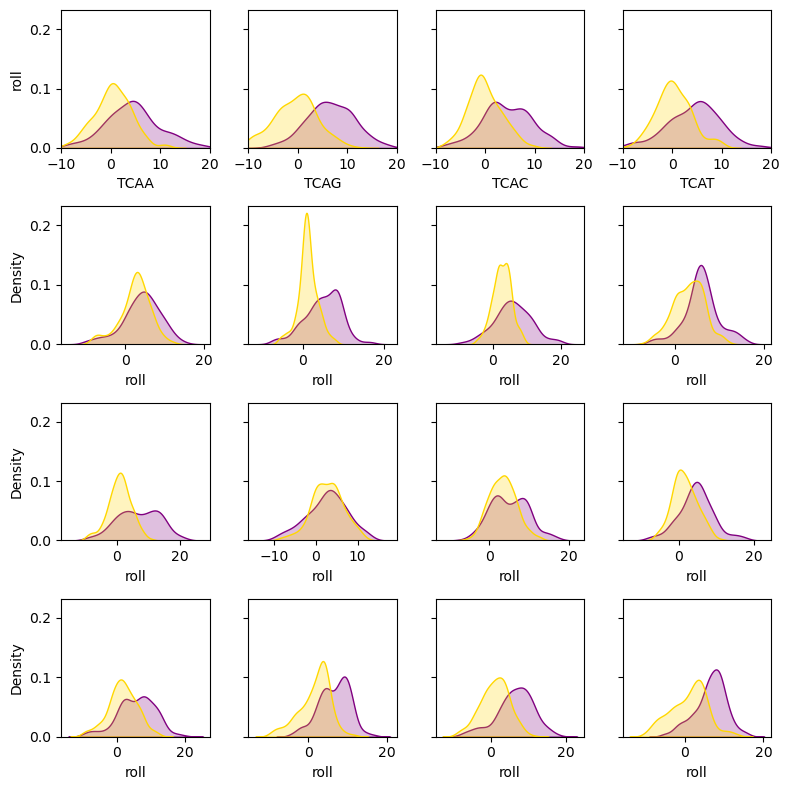

<Figure size 640x480 with 0 Axes>

In [50]:
dimsteps_colors = {'AC':'gold', 'CA':'purple'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharey=True)

    for i in range(0, 4):
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i+4]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i+4]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+4], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i+8]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i+8]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+8], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ca[tet_dataset_ca.TETRAMER==tet_grid_ca[i+12]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ac[tet_dataset_ac.TETRAMER==tet_grid_ac[i+12]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+12], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

    plt.ylabel('')

    plt.tight_layout()
    plt.show()
    plt.clf()

In [51]:
tet_dataset  = pd.read_csv("datafiles/czapla2022_original", index_col=0)
tet_dataset.head()

,tilt,roll,twist,shift,slide,rise,pdb_id,step,from_pdb,step_dimer,step_tetramer,dimer_neighbors
0,7.1224,2.8557,40.0058,0.7123,0.1913,3.5624,4M9V,ATTG,y,TG,TTG,T__
1,4.8587,0.0216,36.3995,1.1445,0.2477,3.3395,4M9V,..CA,y,CA,.CA,.__
2,5.8689,4.8913,39.1791,0.6966,0.2492,3.4575,4GZN,ATTG,y,TG,TTG,T__
3,5.1711,1.3116,36.7074,1.0673,0.1857,3.3467,4GZN,..CA,y,CA,.CA,.__
4,0.4669,5.8410,36.9781,-0.1603,0.6283,3.3481,6UKG,.CTGTT,y,TG,CTGT,C__T


In [80]:
tet_dataset_ori_ac = tet_dataset[(tet_dataset.step_dimer=="AC")
                                 &(tet_dataset.step_tetramer.str.len()==4)
                                 &(~tet_dataset.step_tetramer.str.contains("\."))].reset_index(drop=True)

tet_dataset_ori_ca = tet_dataset[(tet_dataset.step_dimer=="CA")
                                 &(tet_dataset.step_tetramer.str.len()==4)
                                 &(~tet_dataset.step_tetramer.str.contains("\."))].reset_index(drop=True)


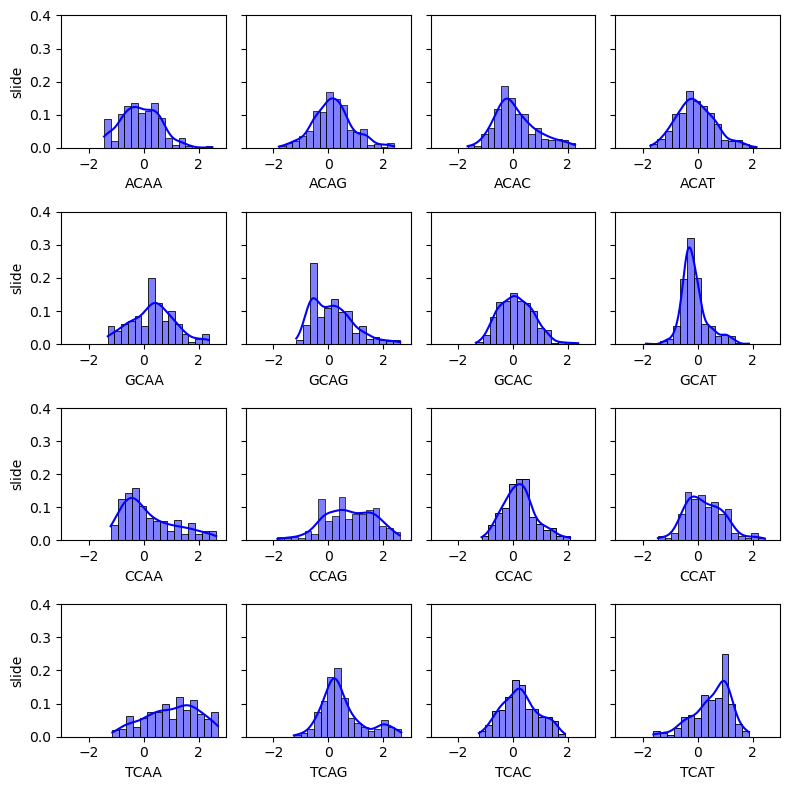

<Figure size 640x480 with 0 Axes>

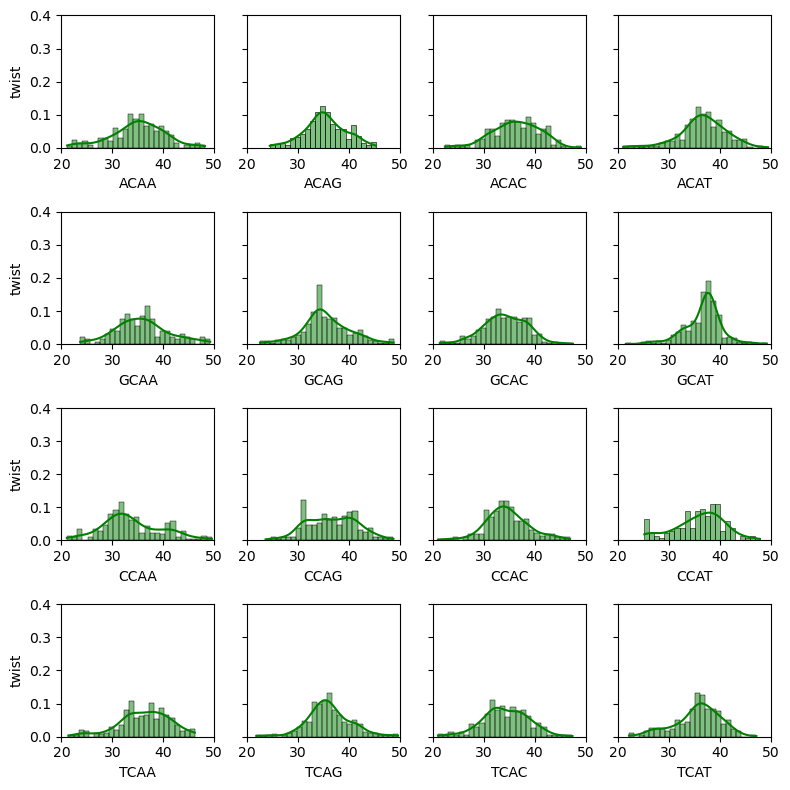

<Figure size 640x480 with 0 Axes>

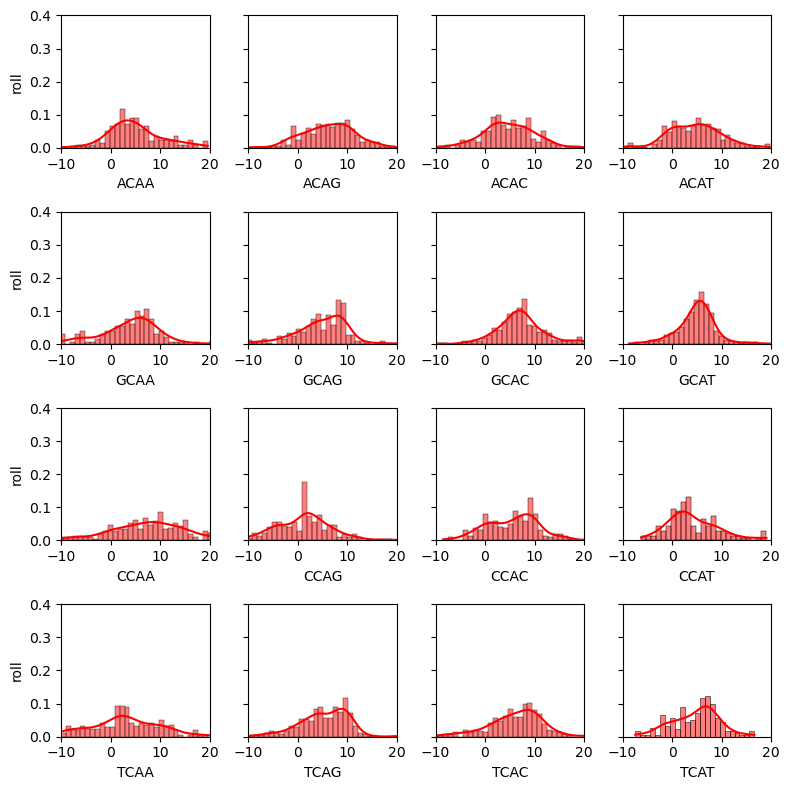

<Figure size 640x480 with 0 Axes>

In [82]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'red'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharey=True)

    sns.histplot(ax=axes[0,0], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[0]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,1], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[1]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,2], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[2]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,3], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[3]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    sns.histplot(ax=axes[1,0], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[4]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,1], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[5]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,2], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[6]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,3], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[7]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[1,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+4], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]),ylim=(0, 0.40))

    sns.histplot(ax=axes[2,0], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[8]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,1], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[9]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,2], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[10]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,3], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[11]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[2,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+8], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    sns.histplot(ax=axes[3,0], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[12]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,1], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[13]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,2], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[14]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,3], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[15]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[3,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+12], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    plt.ylabel('')

    plt.tight_layout()
    plt.show()
    plt.clf()

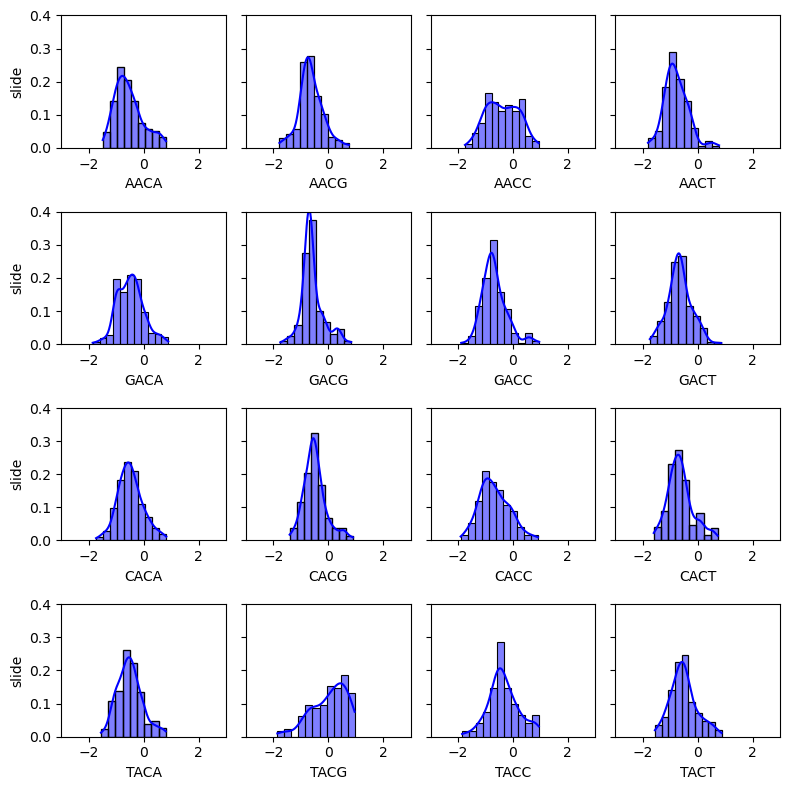

<Figure size 640x480 with 0 Axes>

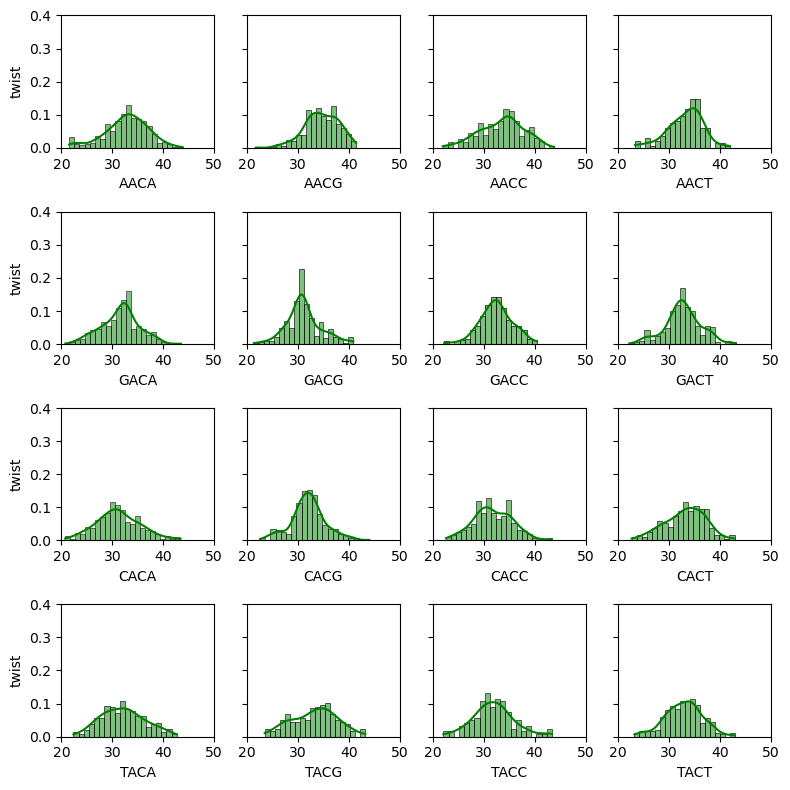

<Figure size 640x480 with 0 Axes>

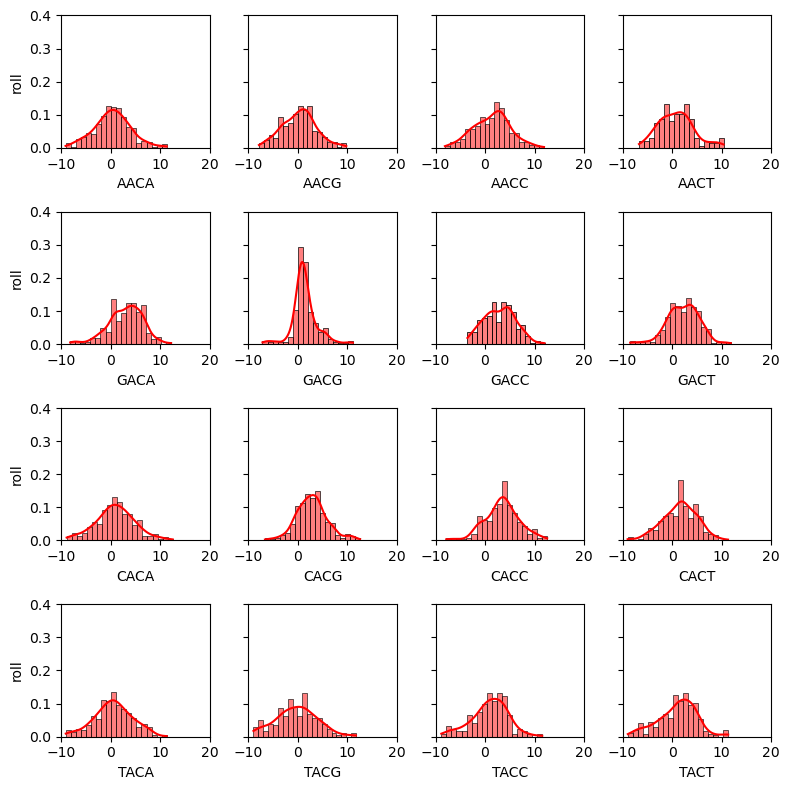

<Figure size 640x480 with 0 Axes>

In [85]:
par_colors = {'slide':'blue', 'twist':'green', 'roll':'red'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharey=True)

    sns.histplot(ax=axes[0,0], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[0]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,1], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[1]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,2], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[2]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[0,3], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[3]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ac[i], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    sns.histplot(ax=axes[1,0], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[4]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,1], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[5]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,2], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[6]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[1,3], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[7]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[1,i].set(ylabel=PAR, xlabel=tet_grid_ac[i+4], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]),ylim=(0, 0.40))

    sns.histplot(ax=axes[2,0], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[8]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,1], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[9]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,2], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[10]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[2,3], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[11]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[2,i].set(ylabel=PAR, xlabel=tet_grid_ac[i+8], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    sns.histplot(ax=axes[3,0], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[12]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,1], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[13]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,2], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[14]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    sns.histplot(ax=axes[3,3], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[15]], stat='probability', kde=True, binwidth=par_bins[PAR], x=PAR, color=par_colors[PAR], fill=True)
    for i in range(0, 4):
        axes[3,i].set(ylabel=PAR, xlabel=tet_grid_ac[i+12], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]), ylim=(0, 0.40))

    plt.ylabel('')

    plt.tight_layout()
    plt.show()
    plt.clf()

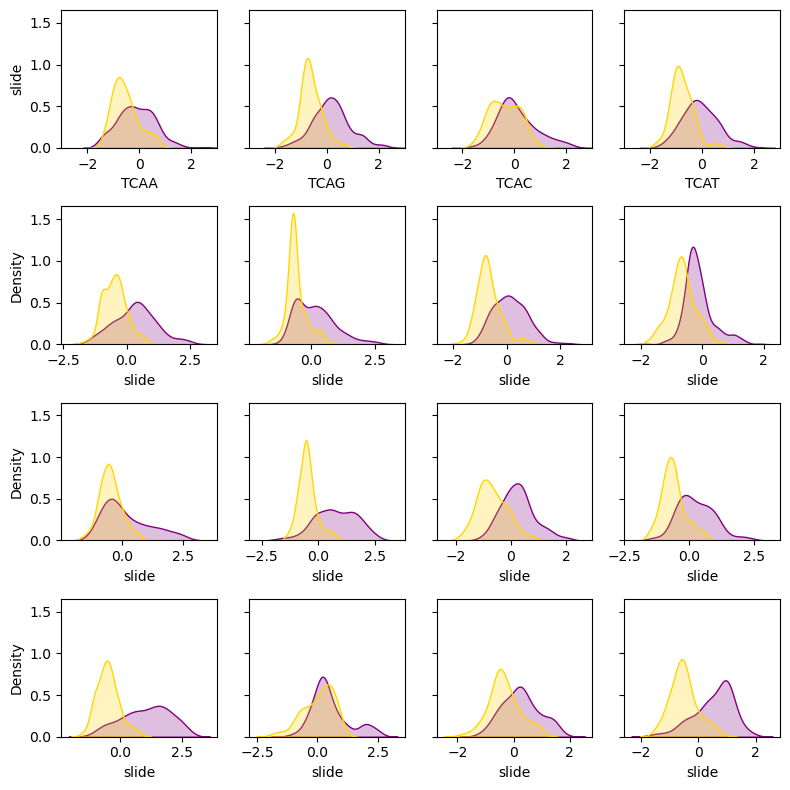

<Figure size 640x480 with 0 Axes>

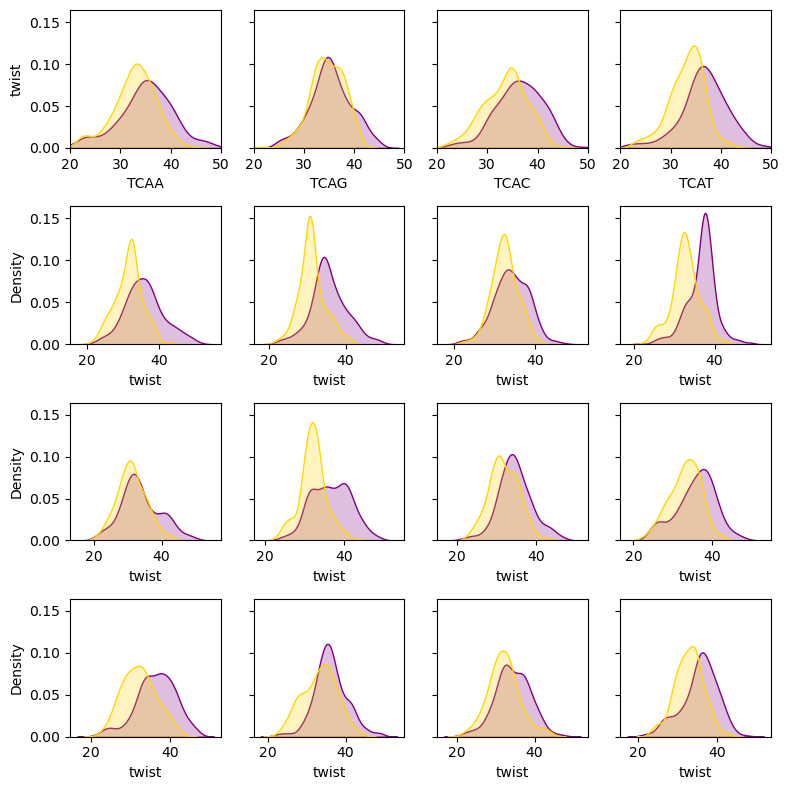

<Figure size 640x480 with 0 Axes>

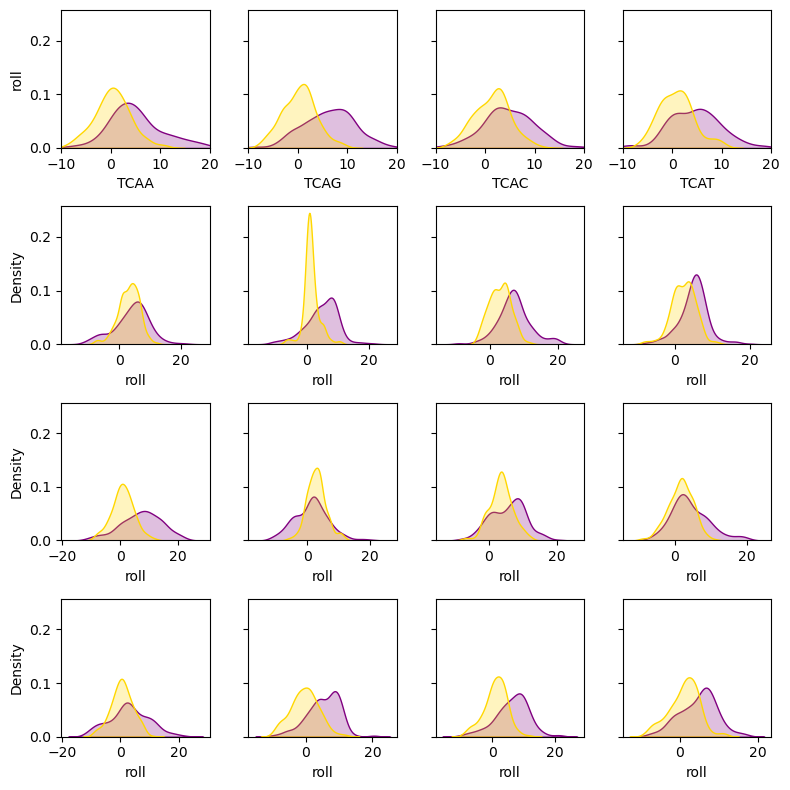

<Figure size 640x480 with 0 Axes>

In [87]:
dimsteps_colors = {'AC':'gold', 'CA':'purple'}
par_ranges = {'slide':[-3,3], 'twist':[20, 50], 'roll':[-10,20]}
par_bins = {'slide':0.25, 'twist':1.0, 'roll':1.0}
for PAR in ['slide','twist','roll']:
    
    fig, axes = plt.subplots(4,4, figsize=(8,8), sharey=True)

    for i in range(0, 4):
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[i]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[0,i], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[i]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[i+4]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[1,i], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[i+4]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+4], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[i+8]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[2,i], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[i+8]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+8], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ori_ca[tet_dataset_ori_ca.step_tetramer==tet_grid_ca[i+12]], x=PAR, color=dimsteps_colors['CA'], fill=True)
        sns.kdeplot(ax=axes[3,i], data=tet_dataset_ori_ac[tet_dataset_ori_ac.step_tetramer==tet_grid_ac[i+12]], x=PAR, color=dimsteps_colors['AC'], fill=True)
        axes[0,i].set(ylabel=PAR, xlabel=tet_grid_ca[i+12], xlim=(par_ranges[PAR][0], par_ranges[PAR][1]))

    plt.ylabel('')

    plt.tight_layout()
    plt.show()
    plt.clf()